In [0]:
!pip3 install ktrain

In [2]:
# import ktrain
import ktrain
from ktrain import text

ktrain.__version__

'0.13.2'

In [3]:
# using code from second tutorial (distilbert tutorial)
# https://towardsdatascience.com/text-classification-with-hugging-face-transformers-in-tensorflow-2-without-tears-ee50e4f3e7ed

categories = ['alt.atheism', 'soc.religion.christian',
             'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
train_b = fetch_20newsgroups(subset='train',
   categories=categories, shuffle=True, random_state=42)
test_b = fetch_20newsgroups(subset='test',
   categories=categories, shuffle=True, random_state=42)

print('size of training set: %s' % (len(train_b['data'])))
print('size of validation set: %s' % (len(test_b['data'])))
print('classes: %s' % (train_b.target_names))

x_train = train_b.data
y_train = train_b.target
x_test = test_b.data
y_test = test_b.target

size of training set: 2257
size of validation set: 1502
classes: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


In [4]:
# THIS CELL DOES NOT RUN -- TUTORIAL CODE IS BROKEN
# import keras
# print(keras.__version__)

# step 1 create a transformer instance
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500, classes=train_b.target_names)

# step 2 preprocess data
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)

# step 3 create a model and wrap in learner
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:367: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')



preprocessing train...
language: en
train sequence lengths:
	mean : 308
	95percentile : 837
	99percentile : 1938


preprocessing test...
language: en
test sequence lengths:
	mean : 343
	95percentile : 979
	99percentile : 2562


simulating training for different learning rates... this may take a few moments...
Train for 376 steps
Epoch 1/2
376/376 [==============================] - 146s 389ms/step - loss: 1.0328 - accuracy: 0.5576
Epoch 2/2
376/376 [==============================] - 135s 360ms/step - loss: 1.6026 - accuracy: 0.2541


done.


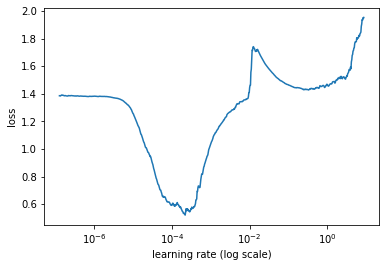

In [5]:
# step 4 [OPTIONAL] estimate the learning rate
learner.lr_find(show_plot=True, max_epochs=2)

In [6]:
# step 5 train the model 
learner.fit_onecycle(5e-5, 4)



begin training using onecycle policy with max lr of 5e-05...
Train for 377 steps, validate for 47 steps
Epoch 1/4
377/377 [==============================] - 172s 455ms/step - loss: 0.6525 - accuracy: 0.7780 - val_loss: 0.2440 - val_accuracy: 0.9208
Epoch 2/4
377/377 [==============================] - 170s 450ms/step - loss: 0.1508 - accuracy: 0.9557 - val_loss: 0.1926 - val_accuracy: 0.9381
Epoch 3/4
377/377 [==============================] - 170s 450ms/step - loss: 0.0524 - accuracy: 0.9832 - val_loss: 0.1471 - val_accuracy: 0.9561
Epoch 4/4
377/377 [==============================] - 170s 450ms/step - loss: 0.0170 - accuracy: 0.9956 - val_loss: 0.1430 - val_accuracy: 0.9634


In [0]:
# step 6 [OPTIONAL] inspect the model
learner.view_top_losses(n=1, preproc=t)
print(x_test[1355])

In [10]:
# step 7 make predictions on new data
predictor = ktrain.get_predictor(learner.model, preproc=t)
predictor.predict('Jesus Christ is the central figure of Christianity.')

'soc.religion.christian'

In [0]:
!pip3 install git+https://github.com/amaiya/eli5@tfkeras_0_10_1

In [12]:
predictor.explain('Jesus Christ is the central figure of Christianity.')

In [0]:
# step 8 [OPTIONAL] save and load predictor
#predictor.save('./my_20newsgroup_predictor')

#reloaded_predictor = ktrain.load_predictor('./my_20newsgroup_predictor')
#reloaded_predictor.get_classes()

#reloaded_predictor.predict('Jesus Christ is the central figure of Christianity.')

#reloaded_predictor.predict_proba('Jesus Christ is the central figure of Christianity.')

array([3.0939963e-03, 6.7910680e-04, 8.4489456e-04, 9.9538201e-01],
      dtype=float32)